# KNN - Basic Implementation

**Dataset**: fake dataset

In [56]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

sns.set_style('white')

%matplotlib inline

In [57]:
# Read in the data and check first 5 rows
df = pd.read_csv('data/KNN_fake1', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Standardizing

Since the KNN classifier works by identifying the nearest K observations, it is essential that the variables are all standardized to the same scale.

In [58]:
# Stanardizing the variables
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

# Create a dataframe for the scaled data and check the first rows
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train Test Split

In [50]:
X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Applying KNN

In [75]:
# Start off by applying the KNN classifer with K=1
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the model with training data
knn.fit(X_train, y_train)

# Predict the test data
pred = knn.predict(X_test)

### Evaluation

In [76]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))

print('\n')
print('Classification Report:')
print(classification_report(y_test, pred, digits=3))

Confusion Matrix:
[[151   8]
 [ 15 126]]


Classification Report:
             precision    recall  f1-score   support

          0      0.910     0.950     0.929       159
          1      0.940     0.894     0.916       141

avg / total      0.924     0.923     0.923       300



With K=1, the error rate is roughly at 8%. Let's see if we can find the optimal value for K that minimizes the error rate.

In [77]:
# Empty list to store error rates
error_rate = []

# From K=1 to K=40, fit/predict/evaluate the model
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    # Record the error rate for each scenario
    error_rate.append(np.mean(pred_i != y_test))

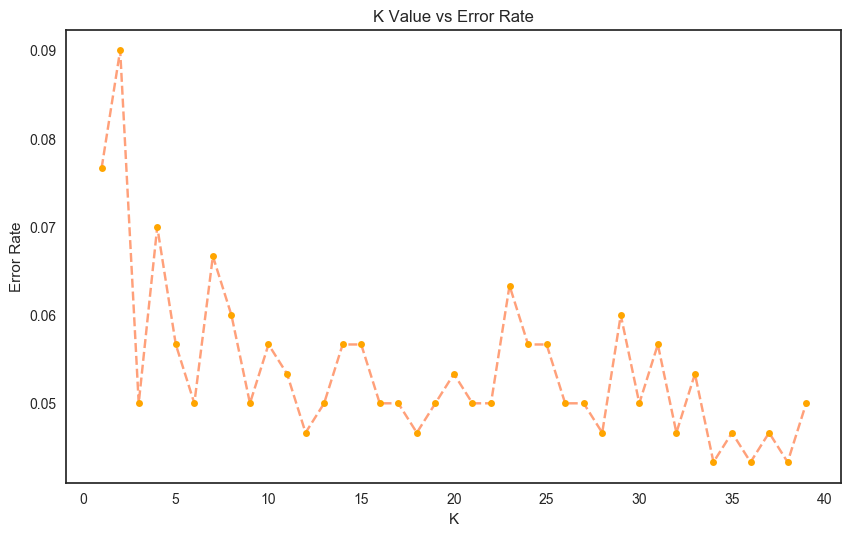

In [78]:
# Visualize the erro rates at each level of K
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(range(1,40), error_rate, color='lightsalmon', linestyle='dashed', 
         marker='o', markerfacecolor='orange', markersize=5)

plt.title('K Value vs Error Rate')
plt.xlabel('K')
plt.ylabel('Error Rate')

It appears that the error rate hits the minimum level at K=34.
Let's apply the KNN classifier with K=34 and check the results.

In [79]:
knn = KNeighborsClassifier(n_neighbors=34)

# Fit the model with training data
knn.fit(X_train, y_train)

# Predict the test data
pred = knn.predict(X_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))

print('\n')
print('Classification Report:')
print(classification_report(y_test, pred, digits=3))

Confusion Matrix:
[[153   6]
 [  7 134]]


Classification Report:
             precision    recall  f1-score   support

          0      0.956     0.962     0.959       159
          1      0.957     0.950     0.954       141

avg / total      0.957     0.957     0.957       300



At K=34, the error rate falls to roughly 4%, an improvement that is twice as better than the K=1 scenario. This shows that choosing the right value for K is critical for the performance of the KNN classifier.